In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
customers = pd.read_csv('Mall_Customers.csv', index_col=False)

In [42]:
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


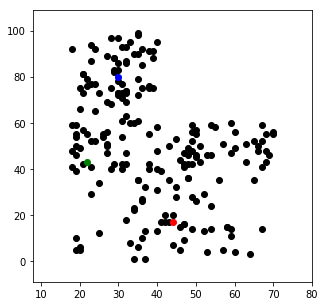

In [43]:
## Initialization
np.random.seed(200)
k = 3

# Define upper and lower bounds of data
xLower = customers['Age'].min()
xUpper = customers['Age'].max()
yLower = customers['Spending Score (1-100)'].min()
yUpper = customers['Spending Score (1-100)'].max()

# Randomly assign 3 centroids
centroids = {
    i+1: [np.random.randint(xLower,xUpper), np.random.randint(yLower,yUpper)]
    for i in range(k)
}

# Plot centroids and data
fig = plt.figure(figsize=(5, 5))
plt.scatter(customers['Age'], customers['Spending Score (1-100)'], color='k')
col_map = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=col_map[i])
plt.xlim(xLower-10, xUpper+10)
plt.ylim(yLower-10, yUpper+10)
plt.show()

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   distance_from_1  distance_from_2  distance_from_3  closest color  
0        33.301652         5.000000        42.449971        2     g  
1        68.007353        38.013156         9.055385        3     b  
2        26.400758        37.054015        74.672619        1     r  
3        63.568860        34.014703         7.615773        3     b  
4        26.419690         9.486833        40.012498        2     g  


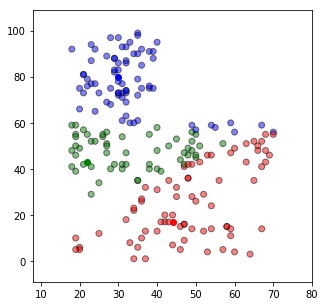

In [44]:
## Assignment
def assignment(df, centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['Age'] - centroids[i][0]) ** 2
                + (df['Spending Score (1-100)'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: col_map[x])
    return df

customers = assignment(customers, centroids)
print(customers.head())

fig = plt.figure(figsize=(5,5))
plt.scatter(customers['Age'], customers['Spending Score (1-100)'], color=customers['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=col_map[i])
plt.xlim(xLower-10,xUpper+10)
plt.ylim(yLower-10,yUpper+10)
plt.show()

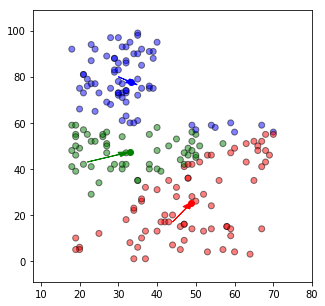

In [45]:
## Update
import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(customers[customers['closest'] == i]['Age'])
        centroids[i][1] = np.mean(customers[customers['closest'] == i]['Spending Score (1-100)'])
    return k

centroids = update(centroids)

fig = plt.figure(figsize=(5,5))
ax = plt.axes()
plt.scatter(customers['Age'], customers['Spending Score (1-100)'], color=customers['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=col_map[i])
plt.xlim(xLower-10, xUpper+10)
plt.ylim(yLower-10, yUpper+10)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=col_map[i], ec=col_map[i])
plt.show()

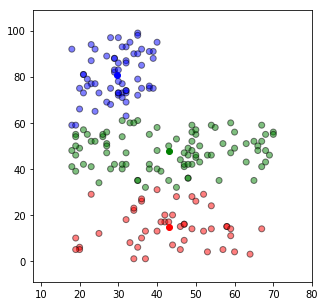

In [46]:
# Continue assignment and update until assigned categories do not change anymore
while True:
    closest_centroids = customers['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(customers, centroids)
    if closest_centroids.equals(customers['closest']):
        break

fig = plt.figure(figsize=(5,5))
plt.scatter(customers['Age'], customers['Spending Score (1-100)'], color=customers['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=col_map[i])
plt.xlim(xLower-10,xUpper+10)
plt.ylim(yLower-10,yUpper+10)
plt.show()